In [82]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c8bfc933-6db2-48d8-b6f8-3a0447146137',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-07-03T02:41:43.175Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 9974}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9598, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [17]:
type(data)

dict

In [32]:
import pandas as pd

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [83]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now', utc = True)

df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9598,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19083562.00000,19083562.00000,NaN,1,NaN,NaN,None,2022-07-03T02:41:00.000Z,19252.38290,16731482298.60270,-41.25440,0.28094,0.25308,-9.90857,-36.97085,-49.30225,-58.10866,367404042789.24792,42.27180,404300040976.32001,None,2022-07-03T02:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 02:42:00.652542+00:00
1,1027,Ethereum,ETH,ethereum,5797,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121388311.12400,121388311.12400,NaN,2,NaN,NaN,None,2022-07-03T02:40:00.000Z,1060.63350,9031407231.25378,-42.41580,0.14024,1.17242,-13.93438,-42.17854,-62.10957,-69.61373,128748508807.72710,14.82040,128748508807.73000,None,2022-07-03T02:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 02:42:00.652542+00:00
2,825,Tether,USDT,tether,35507,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66230318609.98427,68607365339.33806,NaN,3,NaN,NaN,None,2022-07-03T02:40:00.000Z,0.99900,29362623519.29011,-36.70400,0.00288,0.01004,-0.05015,-0.03745,-0.10979,-0.14140,66164076422.01406,7.61620,68538745678.64000,None,2022-07-03T02:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-03 02:42:00.652542+00:00
3,3408,USD Coin,USDC,usd-coin,4743,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55802605112.71548,55802605112.71548,NaN,4,NaN,NaN,None,2022-07-03T02:40:00.000Z,1.00040,3743525147.11390,-22.09380,0.00563,0.02496,-0.00524,0.02691,0.03826,0.08990,55825006048.04557,6.42390,55825006048.05000,None,2022-07-03T02:40:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-03 02:42:00.652542+00:00
4,1839,BNB,BNB,bnb,985,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,None,2022-07-03T02:40:00.000Z,217.98419,688586827.31051,-39.38580,0.49214,1.45936,-8.38264,-29.38312,-43.45741,-50.97209,35591799087.26433,4.09560,35992843211.22000,None,2022-07-03T02:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 02:42:00.652542+00:00


In [34]:
def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'c8bfc933-6db2-48d8-b6f8-3a0447146137',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
  

    df = pd.json_normalize(data['data'])

    df['timestamp'] = pd.to_datetime('now', utc = True)

    df
    
    if not os.path.isfile(r'/Users/adishsundar/Desktop/Data Analytics Projects/API.csv'):
        df.to_csv(r'/Users/adishsundar/Desktop/Data Analytics Projects/API.csv', header = 'column_names')
    else:
        df.to_csv(r'/Users/adishsundar/Desktop/Data Analytics Projects/API.csv', mode = 'a', header = False)

In [35]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) # sleep for 1 minute
exit()

{'status': {'timestamp': '2022-07-03T02:00:16.220Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9974}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9598, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

KeyboardInterrupt: 

In [75]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9598,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19083500.00000,19083500.00000,NaN,1,NaN,NaN,None,2022-07-03T02:00:00.000Z,19187.44673,17033744074.36732,-40.39580,-0.22667,-0.24505,-10.29077,-37.30947,-49.35555,-58.22174,366163639675.71973,42.26480,402936381334.14001,None,2022-07-03T02:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 02:01:16.910278+00:00
1,1027,Ethereum,ETH,ethereum,5797,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121387106.93650,121387106.93650,NaN,2,NaN,NaN,None,2022-07-03T01:59:00.000Z,1057.54713,9270364131.65385,-41.24020,-0.46275,-0.13220,-14.30396,-42.48486,-62.07764,-69.71222,128372586069.79295,14.81750,128372586069.78999,None,2022-07-03T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 02:01:16.910278+00:00
2,825,Tether,USDT,tether,35507,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66230318609.98427,68607365339.33806,NaN,3,NaN,NaN,None,2022-07-03T01:59:00.000Z,0.99895,29816979188.48045,-35.93430,-0.00349,-0.01038,-0.05333,-0.04820,-0.10512,-0.13979,66161081096.63073,7.63670,68535642849.19000,None,2022-07-03T01:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-03 02:01:16.910278+00:00
3,3408,USD Coin,USDC,usd-coin,4743,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55802605112.71548,55802605112.71548,NaN,4,NaN,NaN,None,2022-07-03T01:59:00.000Z,0.99990,3788277188.89124,-21.45440,-0.00295,-0.05228,-0.00756,-0.02912,-0.00393,0.03500,55797295603.01787,6.43870,55797295603.02000,None,2022-07-03T01:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-03 02:01:16.910278+00:00
4,1839,BNB,BNB,bnb,985,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,None,2022-07-03T01:59:00.000Z,216.95513,698411213.94928,-39.30660,-0.31788,0.76993,-8.54081,-29.85648,-43.58792,-51.28104,35423776758.98773,4.08770,35822927627.50000,None,2022-07-03T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 02:01:16.910278+00:00


In [76]:
df3 = pd.read_csv(r'/Users/adishsundar/Desktop/Data Analytics Projects/API.csv')
df3.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9598,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19083500.00000,19083500.00000,NaN,1,NaN,NaN,NaN,2022-07-03T01:58:00.000Z,19189.04446,17030989408.89434,-40.41140,-0.21371,-0.23164,-10.26182,-37.31506,-49.35001,-58.21122,366194129910.17743,42.26830,402969933613.53003,NaN,2022-07-03T01:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 02:00:16.311671+00:00
1,1,1027,Ethereum,ETH,ethereum,5797,2015-08-07T00:00:00.000Z,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,121387106.93650,121387106.93650,NaN,2,NaN,NaN,NaN,2022-07-03T01:57:00.000Z,1057.19925,9269261622.17735,-41.28290,-0.47002,-0.16941,-14.30123,-42.48423,-62.09572,-69.72152,128330358147.73140,14.81270,128330358147.73000,NaN,2022-07-03T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 02:00:16.311671+00:00
2,2,825,Tether,USDT,tether,35507,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,66230318609.98427,68607365339.33806,NaN,3,NaN,NaN,NaN,2022-07-03T01:57:00.000Z,0.99900,29820525037.88773,-35.95990,0.00061,0.00521,-0.05358,-0.03675,-0.09956,-0.13689,66163992585.15515,7.63700,68538658832.82000,NaN,2022-07-03T01:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-03 02:00:16.311671+00:00
3,3,3408,USD Coin,USDC,usd-coin,4743,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,55802605112.71548,55802605112.71548,NaN,4,NaN,NaN,NaN,2022-07-03T01:57:00.000Z,1.00005,3794078911.41320,-21.34240,0.00695,-0.03570,0.00399,-0.03540,0.00798,0.04230,55805330930.04492,6.44270,55805330930.04000,NaN,2022-07-03T01:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-03 02:00:16.311671+00:00
4,4,1839,BNB,BNB,bnb,985,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,NaN,2022-07-03T01:57:00.000Z,216.79361,698354196.31745,-39.35990,-0.36191,0.68625,-8.56617,-29.83372,-43.63987,-51.33391,35397404770.05354,4.08660,35796258482.16000,NaN,2022-07-03T01:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 02:00:16.311671+00:00


In [37]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [77]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9598,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19083500.00000,19083500.00000,NaN,1,NaN,NaN,None,2022-07-03T02:00:00.000Z,19187.44673,17033744074.36732,-40.39580,-0.22667,-0.24505,-10.29077,-37.30947,-49.35555,-58.22174,366163639675.71973,42.26480,402936381334.14001,None,2022-07-03T02:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 02:01:16.910278+00:00
1,1027,Ethereum,ETH,ethereum,5797,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121387106.93650,121387106.93650,NaN,2,NaN,NaN,None,2022-07-03T01:59:00.000Z,1057.54713,9270364131.65385,-41.24020,-0.46275,-0.13220,-14.30396,-42.48486,-62.07764,-69.71222,128372586069.79295,14.81750,128372586069.78999,None,2022-07-03T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 02:01:16.910278+00:00
2,825,Tether,USDT,tether,35507,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66230318609.98427,68607365339.33806,NaN,3,NaN,NaN,None,2022-07-03T01:59:00.000Z,0.99895,29816979188.48045,-35.93430,-0.00349,-0.01038,-0.05333,-0.04820,-0.10512,-0.13979,66161081096.63073,7.63670,68535642849.19000,None,2022-07-03T01:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-07-03 02:01:16.910278+00:00
3,3408,USD Coin,USDC,usd-coin,4743,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,55802605112.71548,55802605112.71548,NaN,4,NaN,NaN,None,2022-07-03T01:59:00.000Z,0.99990,3788277188.89124,-21.45440,-0.00295,-0.05228,-0.00756,-0.02912,-0.00393,0.03500,55797295603.01787,6.43870,55797295603.02000,None,2022-07-03T01:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-07-03 02:01:16.910278+00:00
4,1839,BNB,BNB,bnb,985,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,None,2022-07-03T01:59:00.000Z,216.95513,698411213.94928,-39.30660,-0.31788,0.76993,-8.54081,-29.85648,-43.58792,-51.28104,35423776758.98773,4.08770,35822927627.50000,None,2022-07-03T01:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-07-03 02:01:16.910278+00:00


In [39]:
df4 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.22667,-0.24505,-10.29077,-37.30947,-49.35555,-58.22174
Ethereum,-0.46275,-0.13220,-14.30396,-42.48486,-62.07764,-69.71222
Tether,-0.00349,-0.01038,-0.05333,-0.04820,-0.10512,-0.13979
USD Coin,-0.00295,-0.05228,-0.00756,-0.02912,-0.00393,0.03500
BNB,-0.31788,0.76993,-8.54081,-29.85648,-43.58792,-51.28104
Binance USD,0.25538,0.18961,0.08246,0.23341,0.17802,0.09699
Cardano,-0.50780,0.26907,-9.70995,-24.94405,-41.90720,-61.59882
XRP,-0.17774,0.28422,-13.99608,-23.21798,-48.70450,-62.35383
Solana,-0.78827,0.25989,-19.95503,-20.60650,-61.87748,-75.82955


In [78]:
df5 = df4.stack()
df5.head()

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.22667
         quote.USD.percent_change_24h    -0.24505
         quote.USD.percent_change_7d    -10.29077
         quote.USD.percent_change_30d   -37.30947
         quote.USD.percent_change_60d   -49.35555
dtype: float64

In [79]:
df6 = df5.to_frame(name='percent_change')
df6.head()

percent_change
name                                                
Bitcoin quote.USD.percent_change_1h         -0.22667
        quote.USD.percent_change_24h        -0.24505
        quote.USD.percent_change_7d        -10.29077
        quote.USD.percent_change_30d       -37.30947
        quote.USD.percent_change_60d       -49.35555

In [80]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7.head()

,name,level_1,percent_change
0,Bitcoin,quote.USD.percent_change_1h,-0.22667
1,Bitcoin,quote.USD.percent_change_24h,-0.24505
2,Bitcoin,quote.USD.percent_change_7d,-10.29077
3,Bitcoin,quote.USD.percent_change_30d,-37.30947
4,Bitcoin,quote.USD.percent_change_60d,-49.35555


In [81]:
df8 = df7.rename(columns={'level_1': 'time'})
df8.head()

,name,time,percent_change
0,Bitcoin,quote.USD.percent_change_1h,-0.22667
1,Bitcoin,quote.USD.percent_change_24h,-0.24505
2,Bitcoin,quote.USD.percent_change_7d,-10.29077
3,Bitcoin,quote.USD.percent_change_30d,-37.30947
4,Bitcoin,quote.USD.percent_change_60d,-49.35555


In [67]:
df8['time'] = df8['time'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr', '24hr','7d','30d','60d','90d'])
df8

,name,time,percent_change
0,Bitcoin,1hr,-0.22667
1,Bitcoin,24hr,-0.24505
2,Bitcoin,7d,-10.29077
3,Bitcoin,30d,-37.30947
4,Bitcoin,60d,-49.35555
5,Bitcoin,90d,-58.22174
6,Ethereum,1hr,-0.46275
7,Ethereum,24hr,-0.13220
8,Ethereum,7d,-14.30396
9,Ethereum,30d,-42.48486


In [68]:
import seaborn as sb
import matplotlib as plt

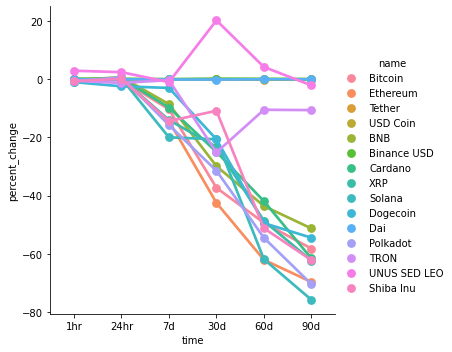

In [70]:
sb.catplot(x='time', y='percent_change', hue='name', data=df8, kind='point')

In [72]:
df9 = df[['name','quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,19187.44673,2022-07-03 02:01:16.910278+00:00
